In [ ]:
#Kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_curve, roc_auc_score,auc,RocCurveDisplay

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


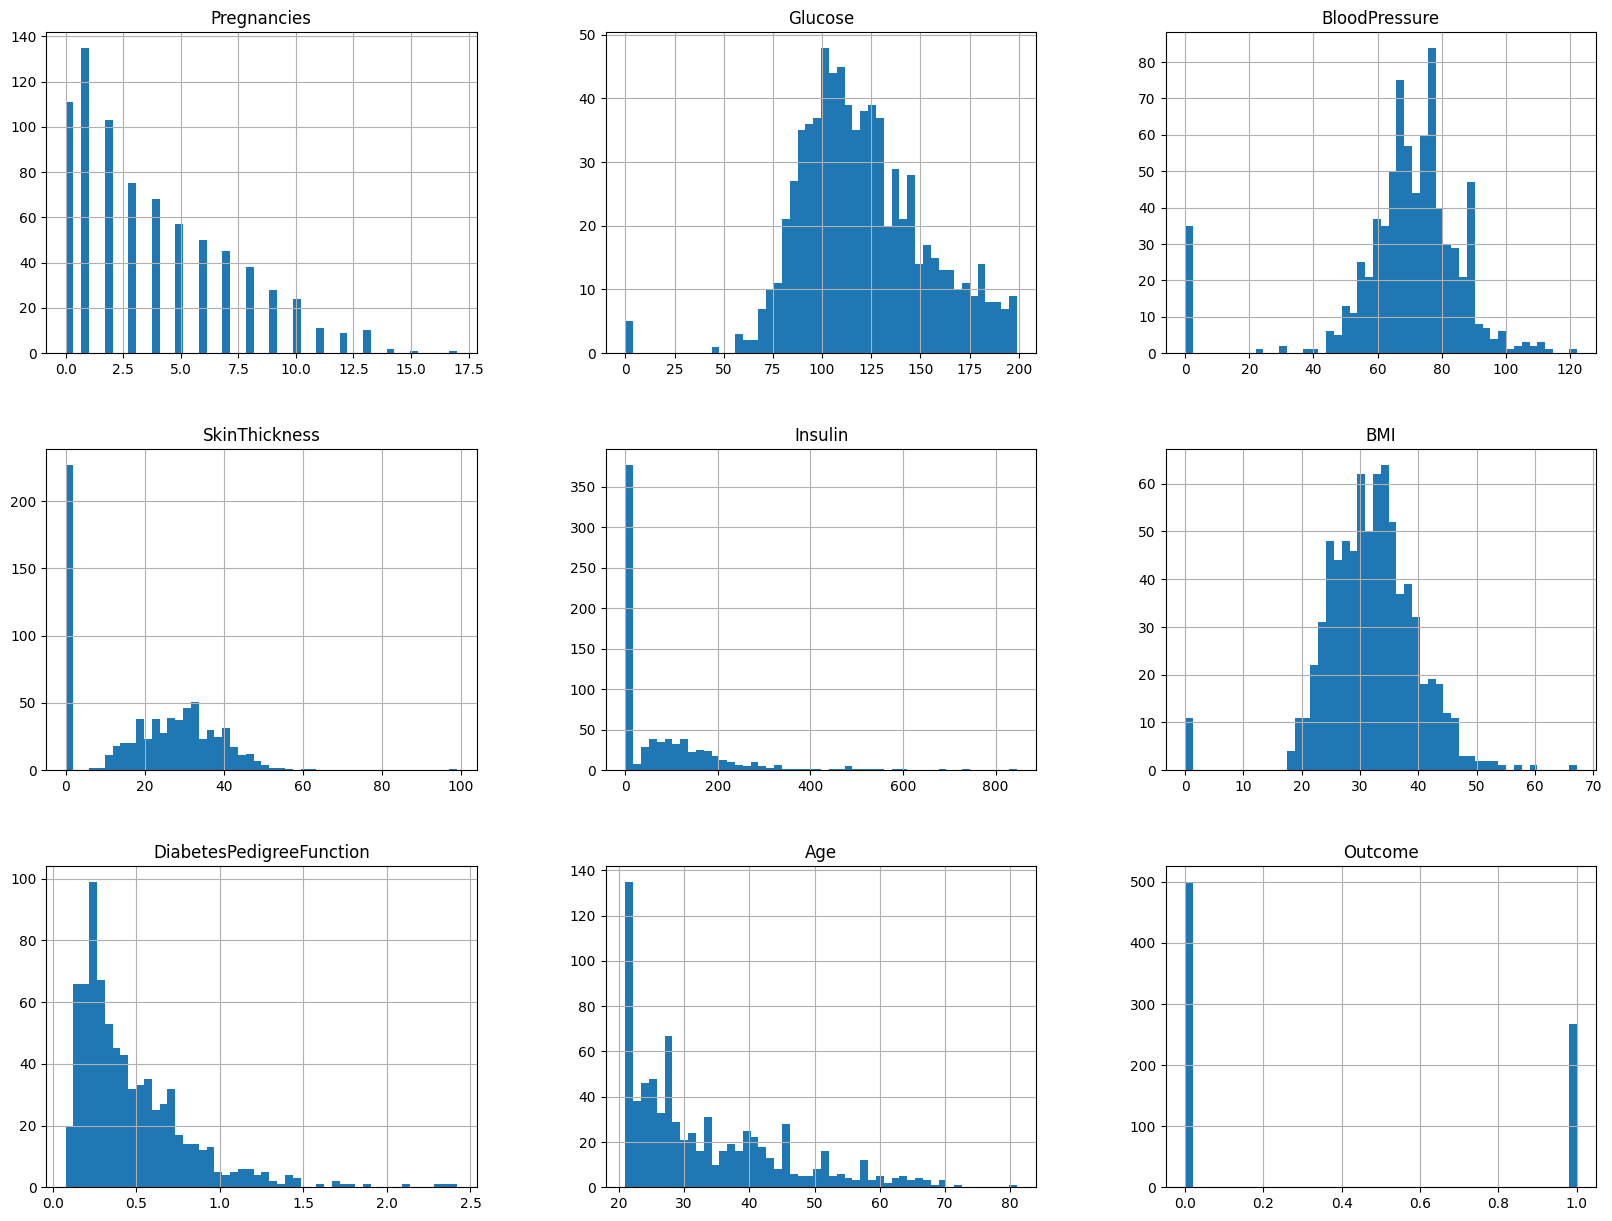

In [ ]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df1=df[df['Outcome']==0]

In [ ]:
dfinsnul=df1[df1['Insulin']==0]


In [ ]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [ ]:
dfp0=df[df['BloodPressure']==0]
dfp0.shape

(35, 9)

In [ ]:
df.drop(dfinsnul.index, inplace=True )

In [ ]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.463791
Age                         0.401418
Pregnancies                 0.317614
BMI                         0.239661
SkinThickness               0.171292
Insulin                     0.121992
DiabetesPedigreeFunction    0.108065
BloodPressure               0.053354
dtype: float64

In [ ]:
df['Outcome'].value_counts()

1    268
0    264
Name: Outcome, dtype: int64

# ML ga **tayyorlaymiz**

In [ ]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Eng yaxshi K ni qiymatini topish

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

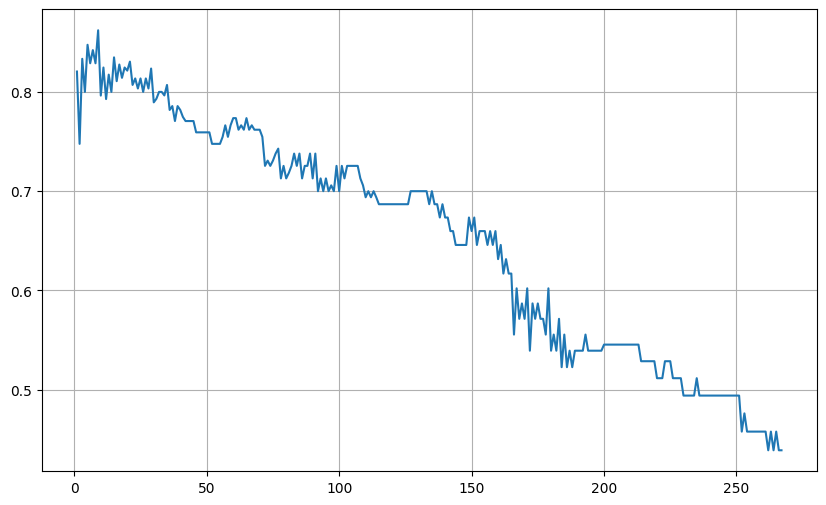

In [ ]:
f1 = []
for k in range(1,268):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,268),f1)
plt.grid()
plt.show()

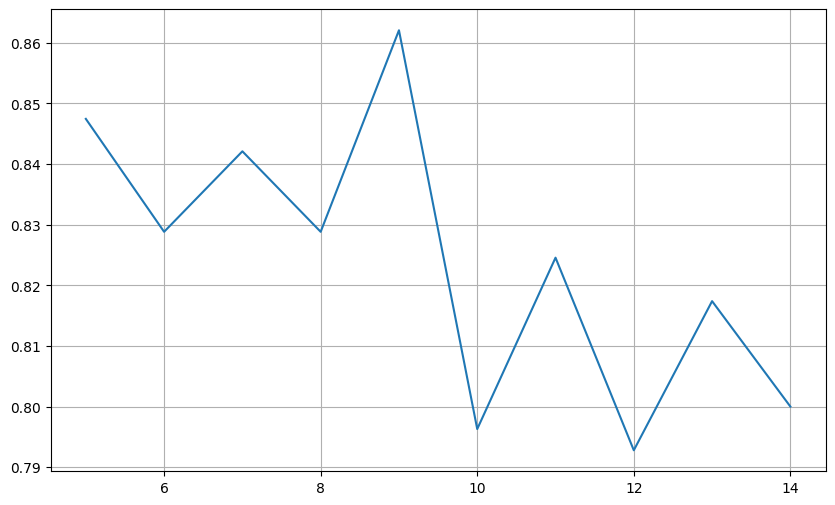

In [ ]:
# Yaqinlashtirib ko`ramiz
f1 = []
for k in range(5,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(5,15),f1)
plt.grid()
plt.show()

In [ ]:

knn = KNeighborsClassifier()

param_grid ={'n_neighbors' : np.arange(5,15)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X , y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 7}

In [ ]:
knn_gscv.best_score_

0.7951154999118322

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.7575757575757576

Model aniqligi: 0.8504672897196262


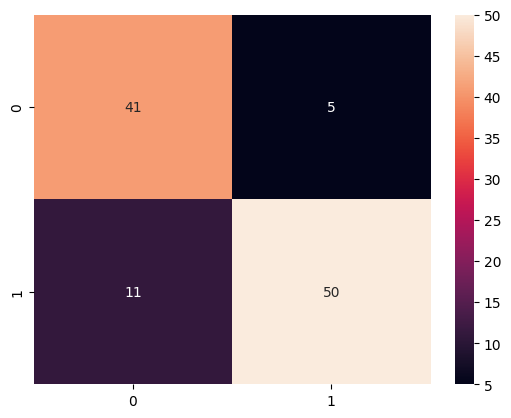

In [ ]:
#Confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
print("Model aniqligi:", accuracy_score(y_test,y_predict))
plt.show()

In [ ]:
#Precision, recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.9090909090909091
recall=0.819672131147541
f1=0.8620689655172413
accuracy=0.8504672897196262


In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Model aniqligi:", accuracy_score(y_test,y_predict))
print("Classification Report: \n",classification_report(y, predict))

Model aniqligi: 0.8504672897196262
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       264
           1       0.84      0.70      0.77       268

    accuracy                           0.78       532
   macro avg       0.79      0.78      0.78       532
weighted avg       0.79      0.78      0.78       532



              precision    recall  f1-score   support

           0       0.80      0.70      0.74        46
           1       0.79      0.87      0.83        61

    accuracy                           0.79       107
   macro avg       0.80      0.78      0.79       107
weighted avg       0.79      0.79      0.79       107

Model aniqligi: 0.794392523364486


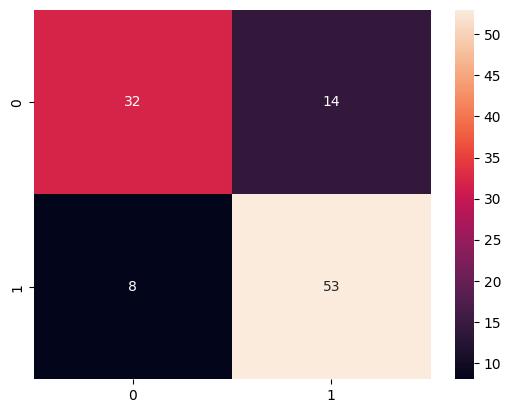

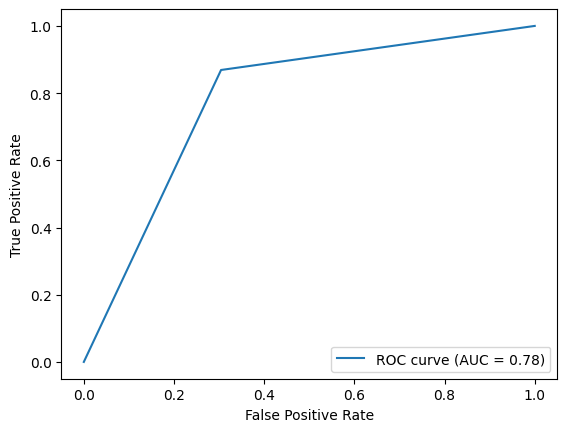

In [ ]:
#RANDOM ROREST
# Modelni tuzamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## **Decision Tree**

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        46
           1       0.91      0.82      0.86        61

    accuracy                           0.85       107
   macro avg       0.85      0.86      0.85       107
weighted avg       0.86      0.85      0.85       107

Model aniqligi: 0.8504672897196262


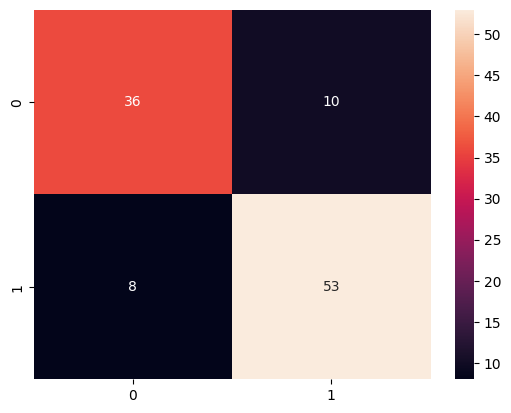

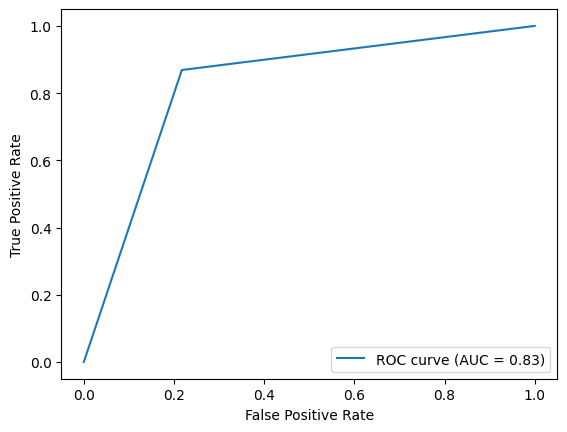

In [ ]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_predict))
print("Model aniqligi:", accuracy_score(y_test,y_predict))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**XBost**

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        46
           1       0.91      0.82      0.86        61

    accuracy                           0.85       107
   macro avg       0.85      0.86      0.85       107
weighted avg       0.86      0.85      0.85       107

Model aniqligi: 0.8317757009345794


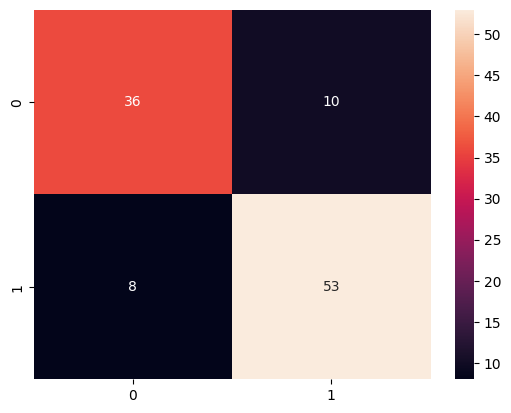

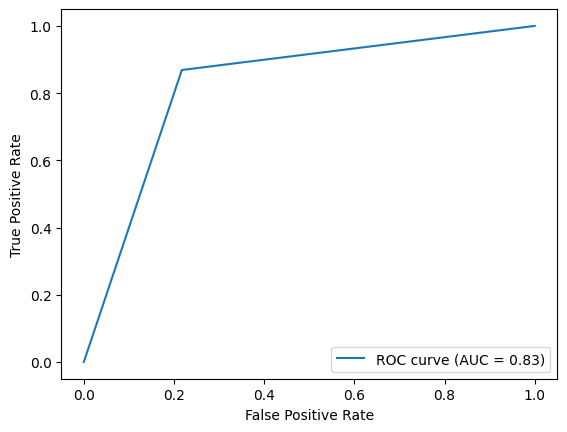

In [ ]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_predict))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()